In [6]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, accuracy_score,confusion_matrix


#### Objective:
Develop a predictive model to estimate individual medical charges based on personal attributes
using linear regression.

#### Tasks:

-Data Preprocessing:

-Exploratory Data Analysis (EDA)

-Model Development

-Model Interpretation

In [8]:
data = pd.read_csv("insurance.csv")

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking for Missing Values

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values. We will now perform EDA

Text(0.5, 1.0, 'Distribution of Charges')

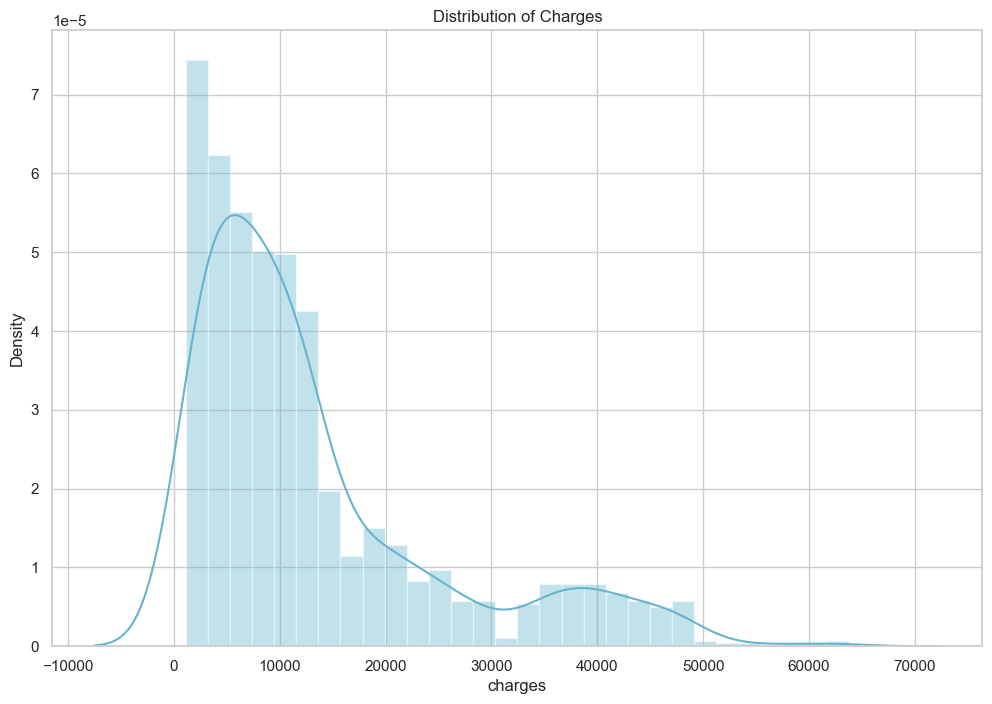

In [15]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

The data is rightly skewed

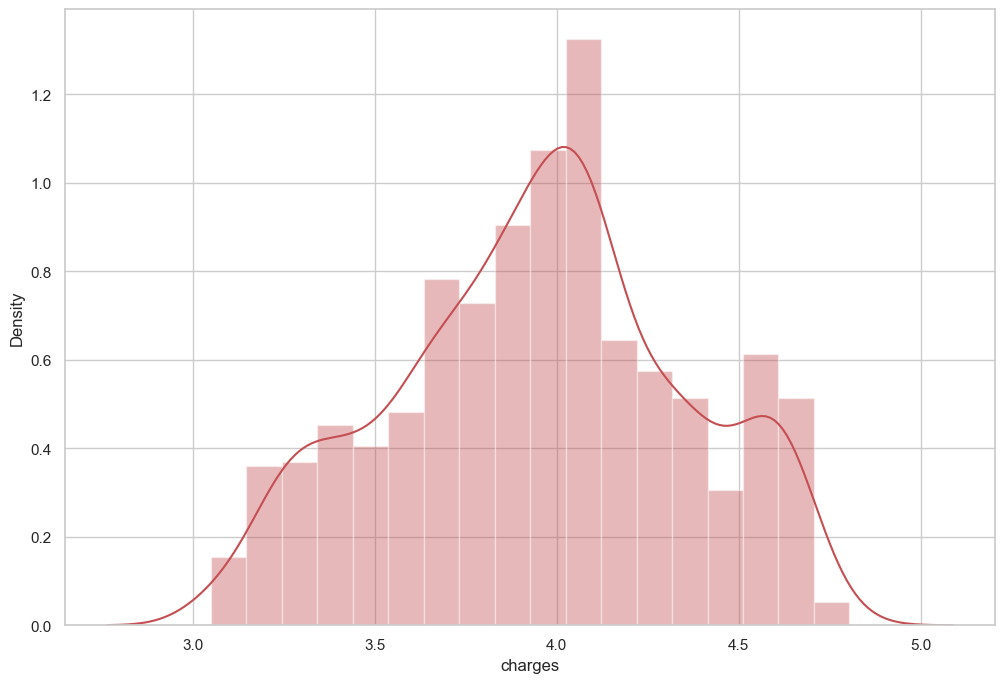

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(data['charges']), kde = True, color = 'r' )

Looking at charges by region

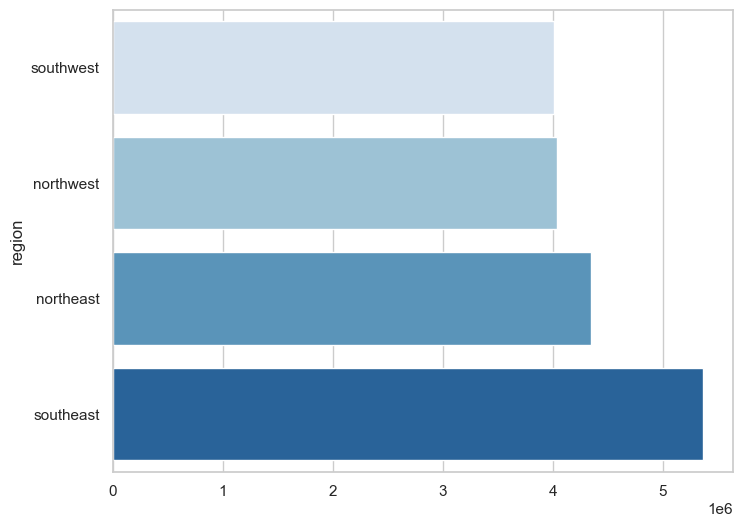

In [24]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.head().values, y=charges.head().index, palette='Blues')

# Show plot
plt.show()

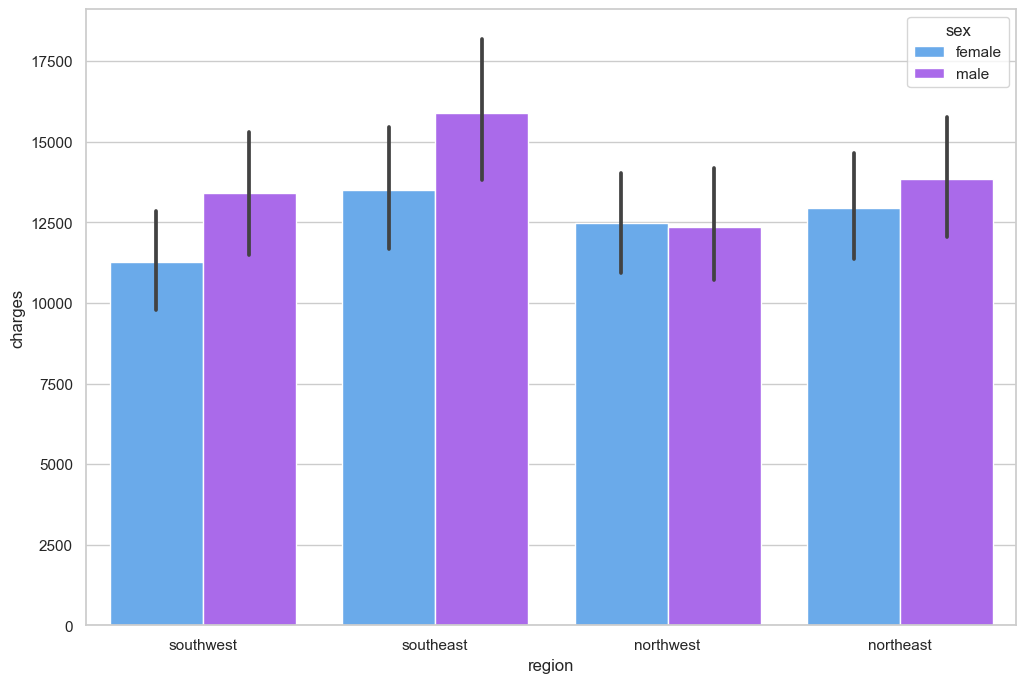

In [26]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='cool')

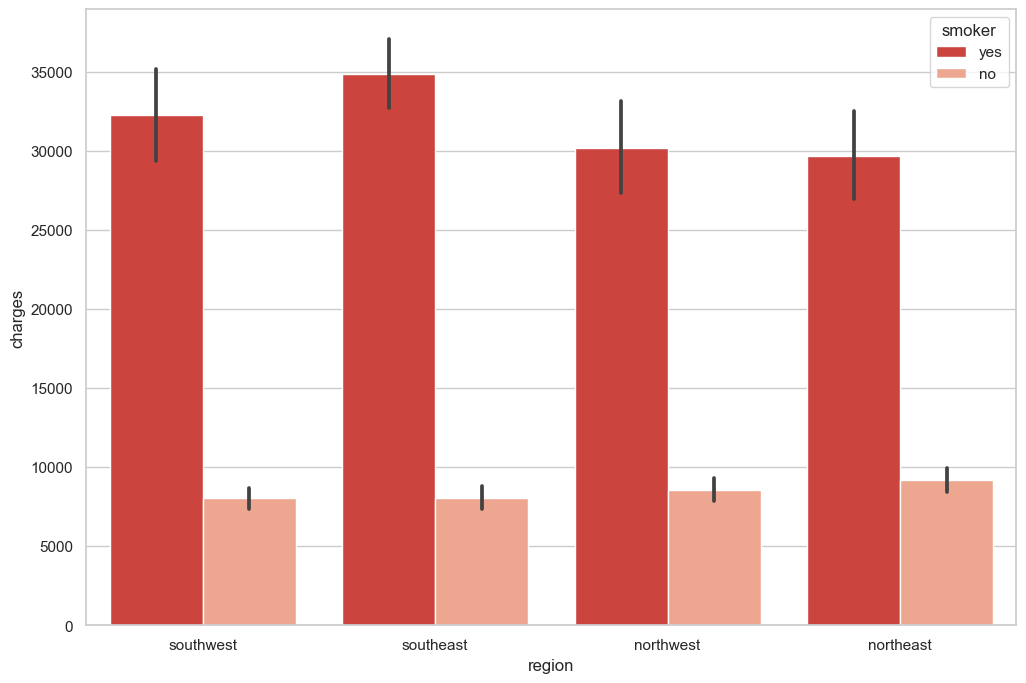

In [27]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=data, palette='Reds_r')

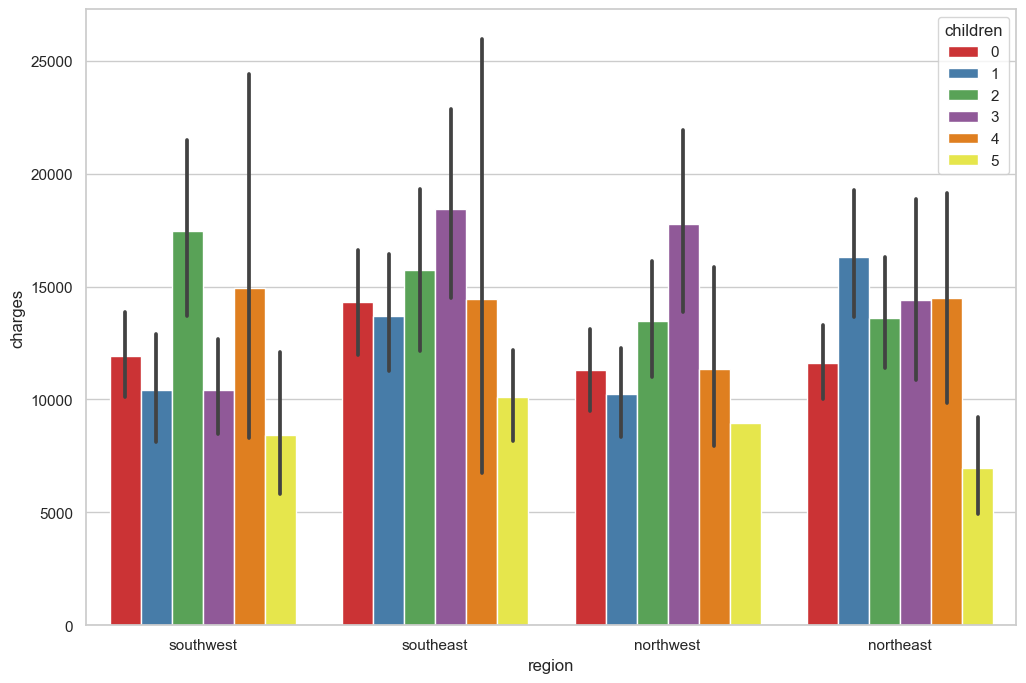

In [28]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')

- Highest charges due to smoking arein the  Southeast but the lowest are in the Northeast.
- People in the Northeast have higher charges by gender than in the Southwest.
  and Northwest. 

- People with children tend to have higher medical costs overall as well


##### Analyzing the medical charges by age, bmi and children according to the smoking factor

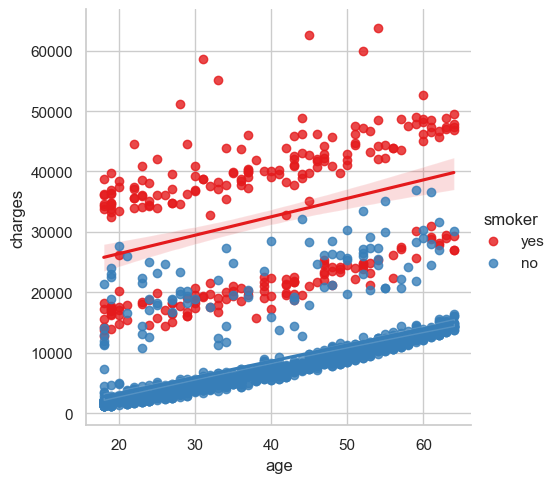

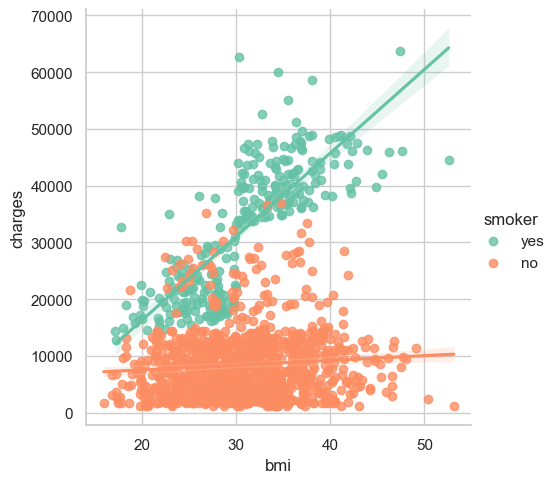

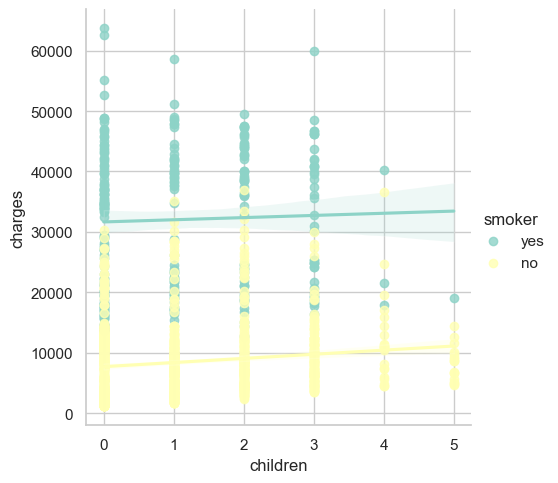

In [29]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set3')

Above visualisation shows: 
- Smoking has the highest impact on medical costs
- People who have children generally smoke less

In [30]:
##Converting objects labels into categorical
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [32]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

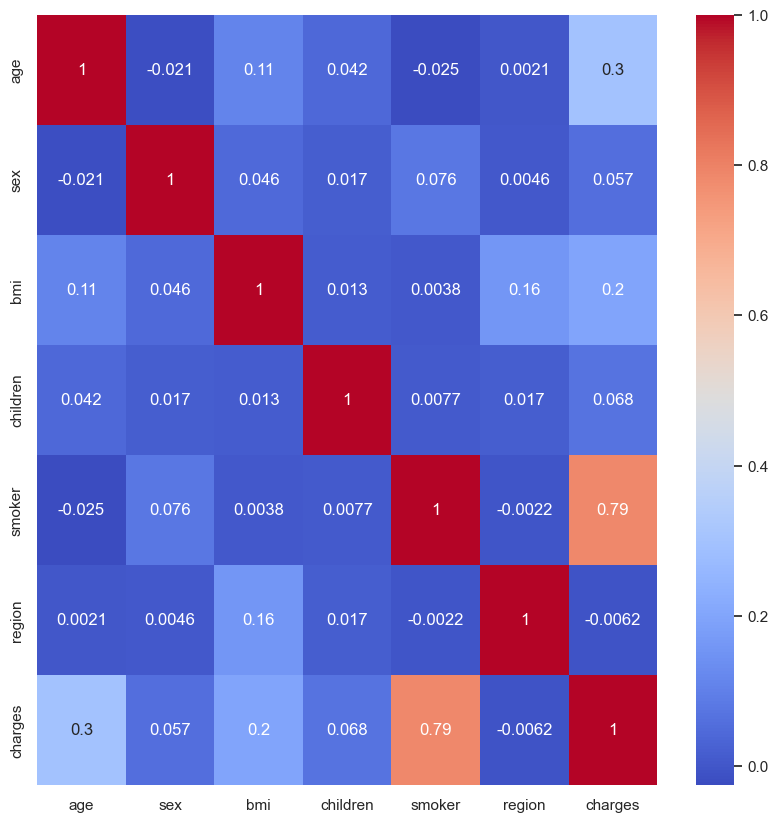

In [34]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

### Applying Linear Regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = data.drop(['charges'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11946.606567263027
[ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
0.7833463107364538


In [42]:
pd.DataFrame(Lin_reg.coef_, x.columns, columns=['Coedicients'])

,Coedicients
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [37]:
y_pred = Lin_reg.predict(x_test)

In [38]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [39]:
MAE

4186.508898366437

In [40]:
MSE

33635210.43117842

In [41]:
RMSE

5799.587091438357

Residuals (Difference between y_test and y_pred)

In [43]:
test_residual= y_test - y_pred

In [44]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'diff':(abs(y_test-y_pred))})

,Actual,Predicted,diff
764,9095.06825,8924.407244,170.661006
887,5272.17580,7116.295018,1844.119218
890,29330.98315,36909.013521,7578.030371
1293,9301.89355,9507.874691,205.981141
259,33750.29180,27013.350008,6736.941792
...,...,...,...
109,47055.53210,39116.968669,7938.563431
575,12222.89830,11814.555568,408.342732
535,6067.12675,7638.107736,1570.980986
543,63770.42801,40959.081722,22811.346288


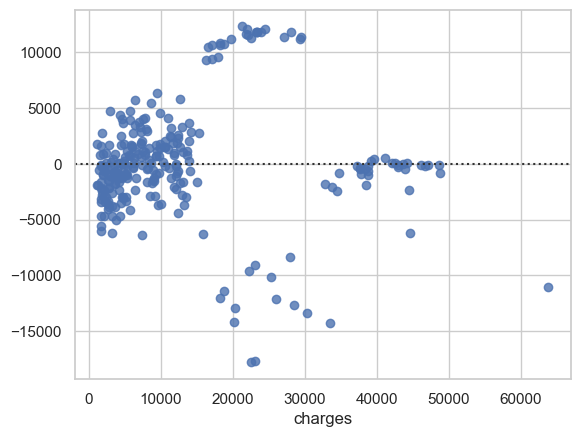

In [46]:
#residuals
sns.residplot(x=y_test, y=y_pred)  
plt.show()

 Saving and Loading the Model (Save the trained model)

In [49]:
from joblib import dump, load
#Save the model
final_model=LinearRegression()
final_model.fit(x_train,y_train)
dump(final_model, 'insurance')

['insurance']

In [56]:
# Load the Model:
load_model=load('insurance')

### Predicting a sample 

In [57]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [58]:
Sample_pred=[[33,1,0,0,1,21984.47061]]

In [59]:
load_model.predict(Sample_pred)

array([-5943875.69628327])